In [3]:
import torch
p = "/mnt/embl/g/kreshuk/hellgoth/projects/ML4ExM_project/mae/output/checkpoint-399.pth"

checkpoint = torch.load(p, map_location="cpu")
checkpoint

{'model': OrderedDict([('cls_token',
               tensor([[[-6.3110e-03,  1.7407e-02,  1.2548e-02,  1.6637e-02, -3.3004e-02,
                         -1.6514e-04,  9.1083e-03, -2.1025e-02,  5.1978e-03, -2.5479e-02,
                          1.4786e-02,  1.6749e-03,  6.1270e-03, -3.5244e-02, -2.0142e-02,
                         -1.2490e-02, -1.2436e-02, -8.3145e-03,  1.3355e-02, -1.2372e-03,
                         -1.6695e-02,  1.1187e-02,  1.5575e-03, -1.0420e-02, -1.8882e-02,
                          1.9080e-02, -3.4346e-02,  4.3278e-02, -3.2458e-03, -1.4856e-02,
                          8.8113e-03,  3.2948e-03, -1.6521e-02, -2.8221e-02,  1.0591e-02,
                          2.7436e-02, -9.2644e-03, -1.4194e-03,  2.0695e-02, -1.0705e-02,
                          3.4925e-03, -1.1997e-02,  1.9209e-02, -1.7333e-02, -2.9305e-03,
                          1.5153e-02,  1.7878e-02, -3.5280e-02,  1.1462e-03, -3.0517e-02,
                          7.8305e-03,  3.4613e-02,  4.2041e-02,

In [5]:
import models_mae

model = models_mae.__dict__["mae_vit_base_patch16"](
    norm_pix_loss=False, in_chans=1
)
checkpoint_model = checkpoint["model"]
model.load_state_dict(checkpoint_model, strict=False)

<All keys matched successfully>

In [6]:
model

MaskedAutoencoderViT(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_feature

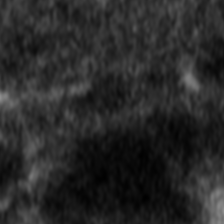

In [8]:
from PIL import Image

p = "/mnt/embl/scratch/hellgoth/data/chlamy_slices_grey_224/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_chunksize-1-1276-1276_slc143.PNG"
img = Image.open(p)
img

In [16]:
import torchvision

sample = torchvision.transforms.functional.to_tensor(img).unsqueeze(0)
model.eval()
loss, pred, mask = model(sample)

In [19]:
loss, pred.shape, mask.shape, sample.shape

(tensor(0.0140, grad_fn=<DivBackward0>),
 torch.Size([1, 196, 256]),
 torch.Size([1, 196]),
 torch.Size([1, 1, 224, 224]))

In [18]:
recon = model.unpatchify(pred)
recon.shape

torch.Size([1, 1, 224, 224])

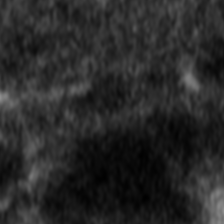

In [20]:
img

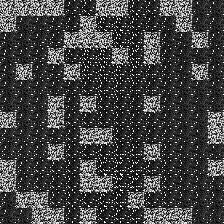

In [21]:
recon_img = torchvision.transforms.functional.to_pil_image(recon.squeeze(0))
recon_img

In [22]:
recon.min(), recon.max(), recon.mean(), recon.std()

(tensor(-1.2705, grad_fn=<MinBackward1>),
 tensor(1.5707, grad_fn=<MaxBackward1>),
 tensor(0.1261, grad_fn=<MeanBackward0>),
 tensor(0.2349, grad_fn=<StdBackward0>))

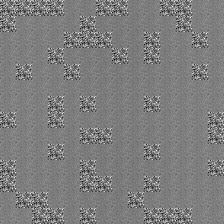

In [28]:
recon2 = torch.round(((recon - recon.min()) / (recon.max() - recon.min()) * 255)).to(torch.uint8)
recon2_img = torchvision.transforms.functional.to_pil_image(recon2.squeeze(0))
recon2_img

In [4]:
import torch
import my_models_mae

p = "/mnt/embl/g/kreshuk/hellgoth/projects/ML4ExM_project/mae/output_224_down/checkpoint-360.pth"

checkpoint = torch.load(p, map_location="cpu")
model = my_models_mae.__dict__["mae_vit_base_patch16"](
    norm_pix_loss=False, in_chans=1
)
checkpoint_model = checkpoint["model"]
model.load_state_dict(checkpoint_model, strict=False)

<All keys matched successfully>

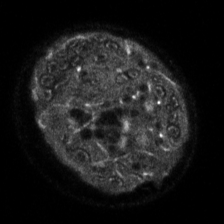

In [5]:
from PIL import Image

p = "/mnt/embl/scratch/hellgoth/data/chlamy_slices_grey_224_down/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_chunksize-1-1276-1276_slc143.PNG"
img = Image.open(p)
img

tensor(nan, grad_fn=<DivBackward0>)
torch.Size([1, 1, 224, 224]) tensor(-1.2352, grad_fn=<MinBackward1>) tensor(1.5986, grad_fn=<MaxBackward1>) tensor(0.1898, grad_fn=<MeanBackward0>) tensor(0.4546, grad_fn=<StdBackward0>)


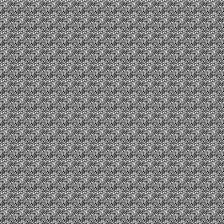

In [6]:
import torchvision

sample = torchvision.transforms.functional.to_tensor(img).unsqueeze(0)
model.eval()
loss, pred, mask = model(sample, mask_ratio=0.0)
print(loss)
recon = model.unpatchify(pred)
print(recon.shape, recon.min(), recon.max(), recon.mean(), recon.std())
recon2 = torch.round(((recon - recon.min()) / (recon.max() - recon.min()) * 255)).to(torch.uint8)
recon2_img = torchvision.transforms.functional.to_pil_image(recon2.squeeze(0))
recon2_img

tensor(0.0049, grad_fn=<DivBackward0>)
torch.Size([1, 1, 224, 224]) tensor(-1.1505, grad_fn=<MinBackward1>) tensor(1.7297, grad_fn=<MaxBackward1>) tensor(0.1191, grad_fn=<MeanBackward0>) tensor(0.3379, grad_fn=<StdBackward0>)


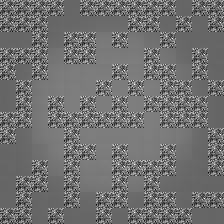

In [7]:
import torchvision

sample = torchvision.transforms.functional.to_tensor(img).unsqueeze(0)
model.eval()
loss, pred, mask = model(sample, mask_ratio=0.5)
print(loss)
recon = model.unpatchify(pred)
print(recon.shape, recon.min(), recon.max(), recon.mean(), recon.std())
recon2 = torch.round(((recon - recon.min()) / (recon.max() - recon.min()) * 255)).to(torch.uint8)
recon2_img = torchvision.transforms.functional.to_pil_image(recon2.squeeze(0))
recon2_img

tensor(0.0170, grad_fn=<DivBackward0>)
torch.Size([1, 1, 224, 224]) tensor(-1.2146, grad_fn=<MinBackward1>) tensor(1.6367, grad_fn=<MaxBackward1>) tensor(0.1580, grad_fn=<MeanBackward0>) tensor(0.4002, grad_fn=<StdBackward0>)


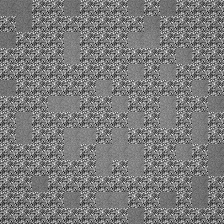

In [8]:
import torchvision

sample = torchvision.transforms.functional.to_tensor(img).unsqueeze(0)
model.eval()
loss, pred, mask = model(sample, mask_ratio=0.25)
print(loss)
recon = model.unpatchify(pred)
print(recon.shape, recon.min(), recon.max(), recon.mean(), recon.std())
recon2 = torch.round(((recon - recon.min()) / (recon.max() - recon.min()) * 255)).to(torch.uint8)
recon2_img = torchvision.transforms.functional.to_pil_image(recon2.squeeze(0))
recon2_img

tensor(0.1082, grad_fn=<DivBackward0>)
torch.Size([1, 1, 224, 224]) tensor(-0.7908, grad_fn=<MinBackward1>) tensor(0.9566, grad_fn=<MaxBackward1>) tensor(0.0359, grad_fn=<MeanBackward0>) tensor(0.2990, grad_fn=<StdBackward0>)


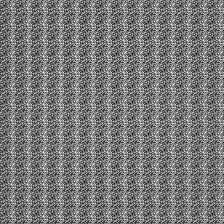

In [9]:
import torchvision

sample = torchvision.transforms.functional.to_tensor(img).unsqueeze(0)
model.eval()
loss, pred, mask = model(sample, mask_ratio=1.0)
print(loss)
recon = model.unpatchify(pred)
print(recon.shape, recon.min(), recon.max(), recon.mean(), recon.std())
recon2 = torch.round(((recon - recon.min()) / (recon.max() - recon.min()) * 255)).to(torch.uint8)
recon2_img = torchvision.transforms.functional.to_pil_image(recon2.squeeze(0))
recon2_img